# Sparse and Non Negative Shallow Auto Encoder without AMD
* Sparsity Regularizer : Difference between Hoyer sparsity measure and objective value (0.6).
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.6
* Sparsity weight: 0.1, 0.5, 1, 5



In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from NNSAE.NNSAE import NNSAE
import datetime
import morphoMaths
import pandas as pd

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_train, _, x_test, y_test = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)
print('x_train shape:', x_train.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [3]:
AE = NNSAE(28*28, 100)

(784, 100)


In [4]:
AE_a = np.load('../Results/NNSAE/18_10_29_FashionMNIST/18_10_29_AE_a_100epochs.npy')
AE_b = np.load('../Results/NNSAE/18_10_29_FashionMNIST/18_10_29_AE_b_100epochs.npy')
AE_W = np.load('../Results/NNSAE/18_10_29_FashionMNIST/18_10_29_AE_W_100epochs.npy')

In [5]:
AE.a = AE_a
AE.b = AE_b
AE.W = AE_W

In [6]:
N, nb_rows, nb_columns, nb_channels = x_train.shape

In [5]:
AE.train(x_train.reshape(N, nb_rows*nb_columns))

Sample  1000
Sample  2000
Sample  3000
Sample  4000
Sample  5000
Sample  6000
Sample  7000
Sample  8000
Sample  9000
Sample  10000
Sample  11000
Sample  12000
Sample  13000
Sample  14000
Sample  15000
Sample  16000
Sample  17000
Sample  18000
Sample  19000
Sample  20000
Sample  21000
Sample  22000
Sample  23000
Sample  24000
Sample  25000
Sample  26000
Sample  27000
Sample  28000
Sample  29000
Sample  30000
Sample  31000
Sample  32000
Sample  33000
Sample  34000
Sample  35000
Sample  36000
Sample  37000
Sample  38000
Sample  39000
Sample  40000
Sample  41000
Sample  42000
Sample  43000
Sample  44000
Sample  45000
Sample  46000
Sample  47000
Sample  48000
Sample  49000
Sample  50000
Sample  51000
Sample  52000
Sample  53000
Sample  54000
Sample  55000
Sample  56000
Sample  57000
Sample  58000
Sample  59000


In [5]:
nb_epochs = 100
for e in range(nb_epochs):
    print("*****Epoch ", e, "*****")
    AE.train(x_train.reshape(N, nb_rows*nb_columns))

*****Epoch  0 *****
*****Epoch  1 *****
*****Epoch  2 *****
*****Epoch  3 *****
*****Epoch  4 *****
*****Epoch  5 *****
*****Epoch  6 *****
*****Epoch  7 *****
*****Epoch  8 *****
*****Epoch  9 *****
*****Epoch  10 *****
*****Epoch  11 *****
*****Epoch  12 *****
*****Epoch  13 *****
*****Epoch  14 *****
*****Epoch  15 *****
*****Epoch  16 *****
*****Epoch  17 *****
*****Epoch  18 *****
*****Epoch  19 *****
*****Epoch  20 *****
*****Epoch  21 *****
*****Epoch  22 *****
*****Epoch  23 *****
*****Epoch  24 *****
*****Epoch  25 *****
*****Epoch  26 *****
*****Epoch  27 *****
*****Epoch  28 *****
*****Epoch  29 *****
*****Epoch  30 *****
*****Epoch  31 *****
*****Epoch  32 *****
*****Epoch  33 *****
*****Epoch  34 *****
*****Epoch  35 *****
*****Epoch  36 *****
*****Epoch  37 *****
*****Epoch  38 *****
*****Epoch  39 *****
*****Epoch  40 *****
*****Epoch  41 *****
*****Epoch  42 *****
*****Epoch  43 *****
*****Epoch  44 *****
*****Epoch  45 *****
*****Epoch  46 *****
*****Epoch  47 *****
**

In [9]:
x_rec_small = AE.apply(x_small.reshape(10, nb_rows*nb_columns)).reshape(10, 28, 28, 1)

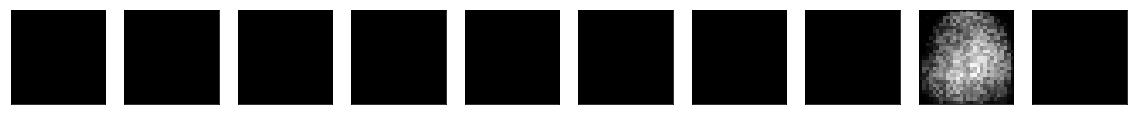

In [10]:
bastien_utils.plot_all_images(x_rec_small)

(array([165.,  75.,  77.,  85., 110.,  93.,  62.,  50.,  43.,  24.]),
 array([0.        , 0.03286558, 0.06573116, 0.09859674, 0.13146232,
        0.1643279 , 0.19719348, 0.23005905, 0.26292463, 0.29579021,
        0.32865579]),
 <a list of 10 Patch objects>)

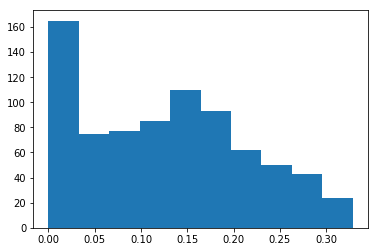

In [20]:
plt.hist(AE_W[:,90].flatten())